[Accueil](../../index.ipynb) > [6.3 diviser pour régner](index.ipynb)

# Implémentation de la fusion 

On a 2 listes triées, on les fusionne afin d'obtenir une seule liste triée.

In [20]:
def fusion(T1, T2):
    """
    T1 : une liste triée
    T2 : une liste triée
    Retourne une liste triée
    """
    result=[]
    i1, i2 = 0, 0
    n1, n2 = len(T1), len(T2)
    # on parcourt les éléments de chaque liste tant que chaque curseur
    # est inférieur la longueur de sa liste
    while i1<n1 and i2 <n2:
        if T1[i1] <= T2[i2]:
            result.append(T1[i1])
            i1+=1
        else:
            result.append(T2[i2])
            i2+=1
    if T1[i1:]:
        print(f"T2[i2:]:{T2[i2:]}")
        result.extend(T2[i2:])
    if T2[i2:]:
        print(f"T1[i1:]:{T1[i1:]}")
        result.extend(T1[i1:])
    return result

fusion([1, 3, 11],[2, 4, 6, 7, 10])

T2[i2:]:[]


[1, 2, 3, 4, 6, 7, 10]

In [2]:
def fusion(L1, L2):
    L = []
    n1, n2 = len(L1), len(L2)
    i1, i2 = 0, 0
    # On boucle jusqu'à atteindre la fin des deux listes
    while i1 < n1 or i2 < n2 :
        # Si c'est la liste 1 qui est finie
        if i1 >= n1:
            L.append(L2[i2]) # on ajoute l'élément de L2
            i2 = i2 + 1      # on incrémente l'indice de L2
        
        # Si c'est la liste 2 qui est finie
        elif i2 >= n2:
            L.append(L1[i1])# on ajoute l'élément de L1
            i1 = i1 + 1      # on incrémente l'indice de L1
        # Sinon on va comparer les deux éléments
        else:
            e1 = L1[i1]
            e2 = L2[i2]
            # si l'élément 1 est inférieur on l'ajoute à la liste et o incrémente son indice
            if e1 <= e2:
                L.append(e1)
                i1 += 1
            # sinon on ajoute e2 à la liste et on incrémente son indice
            else:
                L.append(e2)
                i2 += 1
    return L

fusion([5],[2, 4, 6, 7, 10])

[2, 4, 5, 6, 7, 10]

# Implémentation du tri fusion

In [3]:

#==================================
TABLEAU =[4, 2, 8, 6, 0, 5, 1, 7, 3, 9] #voir https://www.youtube.com/watch?reload=9&v=XaqR3G_NVoo
#TABLEAU =[7, 4, 2, 1, 8, 5, 6, 3]
#TABLEAU =[i for i in range(5,0,-1)]
#==================================

def tri_fusion(tableau):
    """
    tableau : a list of elements
    return the sorted table
    """
    print(tableau)
    # cas général : on peut découper
    if len(tableau)>1:
        pivot = len(tableau)//2
        gauche = tableau[:pivot]
        droite = tableau[pivot:]
        tri_gauche = tri_fusion(gauche)
        tri_droit = tri_fusion(droite)
        fusionne = fusion(tri_gauche, tri_droit)
        return fusionne
    # cas d'arret, le tableau n'a plus qu'un élément
    else:
        return tableau

tri_fusion(TABLEAU)    

[4, 2, 8, 6, 0, 5, 1, 7, 3, 9]
[4, 2, 8, 6, 0]
[4, 2]
[4]
[2]
[8, 6, 0]
[8]
[6, 0]
[6]
[0]
[5, 1, 7, 3, 9]
[5, 1]
[5]
[1]
[7, 3, 9]
[7]
[3, 9]
[3]
[9]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Génération d'un graphique

voir le tri fusion [en video](https://www.youtube.com/watch?v=XaqR3G_NVoo).

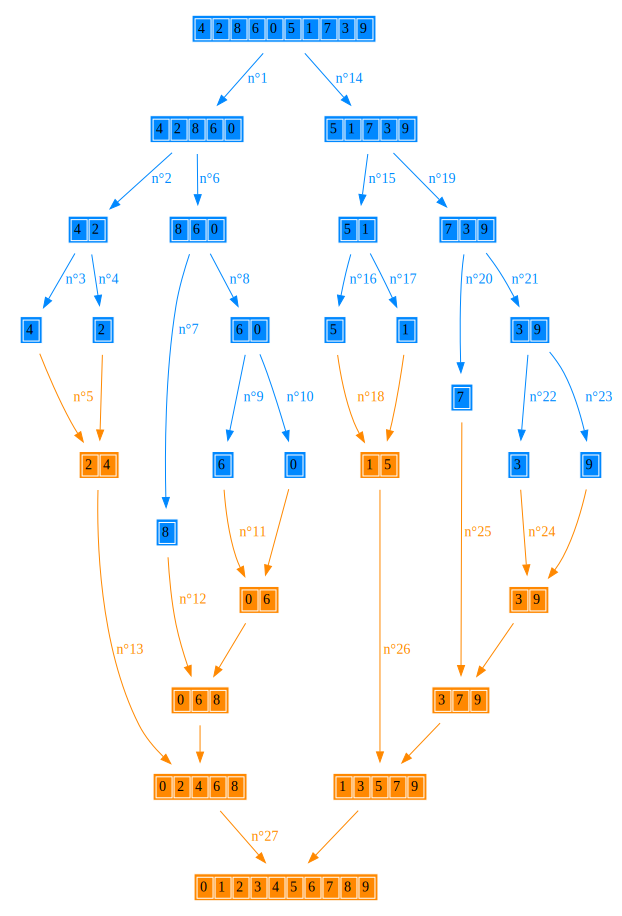

In [10]:
from graphviz import Digraph

# TODO : Il y a certainement moyen de générer l'arbre sans avoir à inclure le graphviz dans les fonctions de fusion et de tri
# générer un graphe/arbre et le parcourir ?

def graph_fusion(T1, T2, id1, id2, counter):
    """
    T1 : une liste triée
    T2 : une liste triée
    """
    #print("=========> graph_fusion(%s, %s, %s, %s)"%(T1, T2, id1, id2))
    counter+=1
    result = []
    color = '#FF8800'
    i, j = 0, 0
    while i<len(T1) and j <len(T2):
        if T1[i] <= T2[j]:
            result.append(T1[i])
            i+=1
        else:
            result.append(T2[j])
            j+=1
    if T1:
        result.extend(T2[j:])
    if T2:
        result.extend(T1[i:])
    id12=id1+id2
    label="<<TABLE bgcolor='%s'><TR>"%color+''.join(['<TD>%s</TD>'%i for i in result])+"</TR></TABLE>>"
    dot.node(id12, label=label)
    dot.edge(id1, id12, label="n°%s"%counter, color = color, fontcolor = color)
    dot.edge(id2, id12, color = color, fontcolor = color)
    #print("=========> %s"%result)
    return result, id12, counter

def graph_tri_fusion(tableau, dot, id_pere='s', side='', counter=0):
    """
    tableau : a list of elements
    return the sorted table
    """
    color = '#0088FF'
    #print("===> graph_tri_fusion(%s)"%tableau)
    if side=='gauche':
        current_id=id_pere+'0'
    elif side=='droite':
        current_id=id_pere+'1'
    else:
        current_id='s'

    label="<<TABLE bgcolor='%s'><TR>"%color+''.join(['<TD>%s</TD>'%i for i in tableau])+"</TR></TABLE>>"
    dot.node(current_id, label=label)
    if id_pere != current_id:
        #print("%s <=> %s"%(id_pere, idp))
        counter+=1
        dot.edge(id_pere, current_id, label="n°%s"%counter, color = color, fontcolor = color)
    if len(tableau)<=1:
        return tableau, current_id, counter
    gauche=tableau[:len(tableau)//2]
    droite=tableau[len(tableau)//2:]
    T1, id1, counter = graph_tri_fusion(gauche, dot, id_pere=current_id, side='gauche', counter=counter)
    T2, id2, counter = graph_tri_fusion(droite, dot, id_pere=current_id, side='droite', counter=counter)
    fus, current_id, counter = graph_fusion(T1, T2, id1, id2, counter)
    #print("===> %s - %s"%(fus, current_id))
    return fus, current_id, counter

dot = Digraph(comment='Tri fusion', format = 'png')
dot.attr('node', color='white')
graph_tri_fusion(TABLEAU, dot)
dot.render('graph') 
dot

# Comparaison d'efficacité avec le tri par insertion

In [5]:
def tri_insertion(tableau): 
    for i in range(1, len(tableau)): 
        k = tableau[i] 
        j = i-1
        while j >= 0 and k < tableau[j] : 
                tableau[j + 1] = tableau[j] 
                j -= 1
        tableau[j + 1] = k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5]
[1, 2]
[1]
[2]
[3, 4, 5]
[3]
[4, 5]
[4]
[5]
[6, 7, 8, 9, 10]
[6, 7]
[6]
[7]
[8, 9, 10]
[8]
[9, 10]
[9]
[10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3, 4, 5]
[1, 2]
[1]
[2]
[3, 4, 5]
[3]
[4, 5]
[4]
[5]
[6, 7, 8, 9, 10]
[6, 7]
[6]
[7]
[8, 9, 10]
[8]
[9, 10]
[9]
[10]
[11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[11, 12, 13, 14, 15]
[11, 12]
[11]
[12]
[13, 14, 15]
[13]
[14, 15]
[14]
[15]
[16, 17, 18, 19, 20]
[16, 17]
[16]
[17]
[18, 19, 20]
[18]
[19, 20]
[19]
[20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3]
[1]
[2, 3]
[2]
[3]
[4, 5, 6, 7]
[4, 5]
[4]
[5]
[6, 7]
[6]
[7]
[8, 9, 10, 11, 12, 13, 14, 15]
[8, 9, 10, 11]
[8, 9]
[8]
[9]
[10, 11]
[10]
[11]
[12, 13, 14, 15]
[12, 13]
[12]
[13]
[14, 15]
[14]
[15]
[16, 17, 18, 19, 20, 21, 22,

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4]
[1, 2]
[1]
[2]
[3, 4]
[3]
[4]
[5, 6, 7, 8]
[5, 6]
[5]
[6]
[7, 8]
[7]
[8]
[9, 10, 11, 12, 13, 14, 15, 16]
[9, 10, 11, 12]
[9, 10]
[9]
[10]
[11, 12]
[11]
[12]
[13, 14, 15, 16]
[13, 14]
[13]
[14]
[15, 16]
[15]
[16]
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[17, 18, 19, 20, 21, 22, 23, 24]
[17, 18, 19, 20]
[17, 18]
[17]
[18]
[19, 20]
[19]
[20]
[21, 22, 23, 24]
[21, 22]
[21]
[22]
[23, 24]
[23]
[24]
[25, 26, 27, 28, 29, 30, 31, 32]
[25, 26, 27, 28]
[25, 26]
[25]
[26]
[27, 28]
[27]
[28]
[29, 30, 31, 32]
[29, 30]
[29]
[30]
[31, 32]
[31]
[32]
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[33, 34, 35, 36, 37, 38, 39, 40]
[33, 34, 35, 36]
[33, 34]
[33]
[34]
[35, 36]
[35]
[36]
[37, 38, 39, 40]
[37, 38]
[37]
[38]
[39, 40]
[39]
[40]
[41, 42, 43, 44, 45, 46, 47, 48]
[41, 42, 43, 44]
[41, 42]

[109]
[110, 111]
[110]
[111]
[112, 113, 114, 115, 116]
[112, 113]
[112]
[113]
[114, 115, 116]
[114]
[115, 116]
[115]
[116]
[117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
[117, 118, 119, 120, 121]
[117, 118]
[117]
[118]
[119, 120, 121]
[119]
[120, 121]
[120]
[121]
[122, 123, 124, 125, 126, 127]
[122, 123, 124]
[122]
[123, 124]
[123]
[124]
[125, 126, 127]
[125]
[126, 127]
[126]
[127]
[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]
[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]
[128, 129, 130, 131, 132, 133, 134, 135, 136, 137]
[128, 129, 130, 131, 132]
[128, 129]
[128]
[129]
[130, 131, 132]
[130]
[131, 132]
[131]
[132]
[133, 134, 135, 136, 137]
[133, 134]
[133]
[134]
[135, 136, 137]
[135]
[136, 137]
[136]
[137]
[138, 139, 140, 141, 142, 143, 144, 145, 146,

[121]
[122, 123, 124]
[122]
[123, 124]
[123]
[124]
[125, 126, 127, 128, 129, 130, 131]
[125, 126, 127]
[125]
[126, 127]
[126]
[127]
[128, 129, 130, 131]
[128, 129]
[128]
[129]
[130, 131]
[130]
[131]
[132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157]
[132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]
[132, 133, 134, 135, 136, 137]
[132, 133, 134]
[132]
[133, 134]
[133]
[134]
[135, 136, 137]
[135]
[136, 137]
[136]
[137]
[138, 139, 140, 141, 142, 143, 144]
[138, 139, 140]
[138]
[139, 140]
[139]
[140]
[141, 142, 143, 144]
[141, 142]
[141]
[142]
[143, 144]
[143]
[144]
[145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157]
[145, 146, 147, 148, 149, 150]
[145, 146, 147]
[145]
[146, 147]
[146]
[147]
[148, 149, 150]
[148]
[149, 150]
[149]
[150]
[151, 152, 153, 154, 155, 156, 157]
[151, 152, 153]
[151]
[152, 153]
[152]
[153]
[154, 155, 156, 157]
[154, 155]
[154]
[155]
[156, 157]
[156]
[157]


[212]
[213]
[214, 215, 216, 217]
[214, 215]
[214]
[215]
[216, 217]
[216]
[217]
[218, 219, 220, 221, 222, 223, 224, 225]
[218, 219, 220, 221]
[218, 219]
[218]
[219]
[220, 221]
[220]
[221]
[222, 223, 224, 225]
[222, 223]
[222]
[223]
[224, 225]
[224]
[225]
[226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240]
[226, 227, 228, 229, 230, 231, 232]
[226, 227, 228]
[226]
[227, 228]
[227]
[228]
[229, 230, 231, 232]
[229, 230]
[229]
[230]
[231, 232]
[231]
[232]
[233, 234, 235, 236, 237, 238, 239, 240]
[233, 234, 235, 236]
[233, 234]
[233]
[234]
[235, 236]
[235]
[236]
[237, 238, 239, 240]
[237, 238]
[237]
[238]
[239, 240]
[239]
[240]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,

[81]
[82, 83, 84]
[82]
[83, 84]
[83]
[84]
[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[85, 86, 87, 88, 89, 90, 91, 92]
[85, 86, 87, 88]
[85, 86]
[85]
[86]
[87, 88]
[87]
[88]
[89, 90, 91, 92]
[89, 90]
[89]
[90]
[91, 92]
[91]
[92]
[93, 94, 95, 96, 97, 98, 99, 100, 101]
[93, 94, 95, 96]
[93, 94]
[93]
[94]
[95, 96]
[95]
[96]
[97, 98, 99, 100, 101]
[97, 98]
[97]
[98]
[99, 100, 101]
[99]
[100, 101]
[100]
[101]
[102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
[102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118]
[102, 103, 104, 105, 106, 107, 108, 109]
[102, 103, 104, 105]
[102, 103]
[102]
[103]
[104, 105]
[104]
[105]
[106, 107, 108, 109]
[106, 107]
[106]
[107]
[108, 109]
[108]
[109]
[110, 111, 112, 113, 114, 115, 116, 117, 118]
[110, 111, 112, 113]
[110, 111]
[110]
[111]
[112, 113]
[112]
[113]
[114, 115, 116, 117,

[286]
[287]
[288, 289, 290]
[288]
[289, 290]
[289]
[290]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 

[15]
[16, 17, 18, 19, 20]
[16, 17]
[16]
[17]
[18, 19, 20]
[18]
[19, 20]
[19]
[20]
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[21, 22, 23, 24, 25]
[21, 22]
[21]
[22]
[23, 24, 25]
[23]
[24, 25]
[24]
[25]
[26, 27, 28, 29, 30]
[26, 27]
[26]
[27]
[28, 29, 30]
[28]
[29, 30]
[29]
[30]
[31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[31, 32, 33, 34, 35]
[31, 32]
[31]
[32]
[33, 34, 35]
[33]
[34, 35]
[34]
[35]
[36, 37, 38, 39, 40]
[36, 37]
[36]
[37]
[38, 39, 40]
[38]
[39, 40]
[39]
[40]
[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[41, 42, 43, 44, 45]
[41, 42]
[41]
[42]
[43, 44, 45]
[43]
[44, 45]
[44]
[45]
[46, 47, 48, 49, 50]
[46, 47]
[46]
[47]
[48, 49, 50]
[48]
[49, 50]
[49]
[50]
[51, 52, 5

[117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
[117, 118, 119, 120, 121]
[117, 118]
[117]
[118]
[119, 120, 121]
[119]
[120, 121]
[120]
[121]
[122, 123, 124, 125, 126, 127]
[122, 123, 124]
[122]
[123, 124]
[123]
[124]
[125, 126, 127]
[125]
[126, 127]
[126]
[127]
[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]
[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]
[128, 129, 130, 131, 132, 133, 134, 135, 136, 137]
[128, 129, 130, 131, 132]
[128, 129]
[128]
[129]
[130, 131, 132]
[130]
[131, 132]
[131]
[132]
[133, 134, 135, 136, 137]
[133, 134]
[133]
[134]
[135, 136, 137]
[135]
[136, 137]
[136]
[137]
[138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148]
[138, 139, 140, 141, 142]
[138, 139]
[138]
[139]
[140, 141, 142]
[140]
[141, 142]
[141]
[142]
[143, 144, 145, 14

[123]
[124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135]
[124, 125, 126, 127, 128, 129]
[124, 125, 126]
[124]
[125, 126]
[125]
[126]
[127, 128, 129]
[127]
[128, 129]
[128]
[129]
[130, 131, 132, 133, 134, 135]
[130, 131, 132]
[130]
[131, 132]
[131]
[132]
[133, 134, 135]
[133]
[134, 135]
[134]
[135]
[136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
[136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157]
[136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146]
[136, 137, 138, 139, 140]
[136, 137]
[136]
[137]
[138, 139, 140]
[138]
[139, 140]
[139]
[140]
[141, 142, 143, 144, 145, 146]
[141, 142, 143]
[141]
[142, 143]
[142]
[143]
[144, 145, 146]
[144]
[145, 146]
[145]
[146]
[147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157]
[147, 148, 149, 150, 151]
[

[216]
[217, 218, 219]
[217]
[218, 219]
[218]
[219]
[220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231]
[220, 221, 222, 223, 224, 225]
[220, 221, 222]
[220]
[221, 222]
[221]
[222]
[223, 224, 225]
[223]
[224, 225]
[224]
[225]
[226, 227, 228, 229, 230, 231]
[226, 227, 228]
[226]
[227, 228]
[227]
[228]
[229, 230, 231]
[229]
[230, 231]
[230]
[231]
[232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277]
[232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254]
[232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242]
[232, 233, 234, 235, 236]
[232, 233]
[232]
[233]
[234, 235, 236]
[234]
[235, 236]
[235]
[236]
[237, 238, 239, 240, 241, 242]
[237, 238, 239]
[237]
[238, 239]
[238]
[239]
[240, 241, 242]
[240]
[241, 242]
[241]
[242]
[243, 244, 245, 246, 247, 24

[248, 249]
[248]
[249]
[250, 251, 252, 253, 254, 255]
[250, 251, 252]
[250]
[251, 252]
[251]
[252]
[253, 254, 255]
[253]
[254, 255]
[254]
[255]
[256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267]
[256, 257, 258, 259, 260, 261]
[256, 257, 258]
[256]
[257, 258]
[257]
[258]
[259, 260, 261]
[259]
[260, 261]
[260]
[261]
[262, 263, 264, 265, 266, 267]
[262, 263, 264]
[262]
[263, 264]
[263]
[264]
[265, 266, 267]
[265]
[266, 267]
[266]
[267]
[268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292]
[268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279]
[268, 269, 270, 271, 272, 273]
[268, 269, 270]
[268]
[269, 270]
[269]
[270]
[271, 272, 273]
[271]
[272, 273]
[272]
[273]
[274, 275, 276, 277, 278, 279]
[274, 275, 276]
[274]
[275, 276]
[275]
[276]
[277, 278, 279]
[277]
[278, 279]
[278]
[279]
[280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292]
[280, 281, 282, 283, 284, 285]
[280, 281, 282]
[280]
[281,

[52]
[53, 54]
[53]
[54]
[55, 56, 57]
[55]
[56, 57]
[56]
[57]
[58, 59, 60, 61, 62, 63]
[58, 59, 60]
[58]
[59, 60]
[59]
[60]
[61, 62, 63]
[61]
[62, 63]
[62]
[63]
[64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
[64, 65, 66, 67, 68, 69]
[64, 65, 66]
[64]
[65, 66]
[65]
[66]
[67, 68, 69]
[67]
[68, 69]
[68]
[69]
[70, 71, 72, 73, 74, 75, 76]
[70, 71, 72]
[70]
[71, 72]
[71]
[72]
[73, 74, 75, 76]
[73, 74]
[73]
[74]
[75, 76]
[75]
[76]
[77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]
[77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
[77, 78, 79, 80, 81, 82]
[77, 78, 79]
[77]
[78, 79]
[78]
[79]
[80, 81, 82]
[80]
[81, 82]
[81]
[82]
[83, 84, 85, 86, 87, 88, 89]
[83, 84, 85]
[83]
[84, 85]
[84]
[85]
[86, 87, 88, 89]
[86, 87]
[86]
[87]
[88, 89]
[88]
[89]
[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]
[90, 91, 92, 93, 94, 95]
[90, 91, 92]
[90]
[91, 92]
[91]
[92]
[93, 94, 95]
[93]
[94, 95]
[94]
[95]
[96, 97, 98, 99, 100, 101, 102]

[266]
[267, 268]
[267]
[268]
[269, 270, 271, 272, 273, 274, 275]
[269, 270, 271]
[269]
[270, 271]
[270]
[271]
[272, 273, 274, 275]
[272, 273]
[272]
[273]
[274, 275]
[274]
[275]
[276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288]
[276, 277, 278, 279, 280, 281]
[276, 277, 278]
[276]
[277, 278]
[277]
[278]
[279, 280, 281]
[279]
[280, 281]
[280]
[281]
[282, 283, 284, 285, 286, 287, 288]
[282, 283, 284]
[282]
[283, 284]
[283]
[284]
[285, 286, 287, 288]
[285, 286]
[285]
[286]
[287, 288]
[287]
[288]
[289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315]
[289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301]
[289, 290, 291, 292, 293, 294]
[289, 290, 291]
[289]
[290, 291]
[290]
[291]
[292, 293, 294]
[292]
[293, 294]
[293]
[294]
[295, 296, 297, 298, 299, 300, 301]
[295, 296, 297]
[295]
[296, 297]
[296]
[297]
[298, 299, 300, 301]
[298, 299]
[298]
[299]
[300, 301]
[300]
[301]
[302, 303, 304, 3

[48]
[49, 50, 51, 52, 53, 54, 55]
[49, 50, 51]
[49]
[50, 51]
[50]
[51]
[52, 53, 54, 55]
[52, 53]
[52]
[53]
[54, 55]
[54]
[55]
[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
[56, 57, 58, 59, 60, 61]
[56, 57, 58]
[56]
[57, 58]
[57]
[58]
[59, 60, 61]
[59]
[60, 61]
[60]
[61]
[62, 63, 64, 65, 66, 67, 68]
[62, 63, 64]
[62]
[63, 64]
[63]
[64]
[65, 66, 67, 68]
[65, 66]
[65]
[66]
[67, 68]
[67]
[68]
[69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[69, 70, 71, 72, 73, 74, 75]
[69, 70, 71]
[69]
[70, 71]
[70]
[71]
[72, 73, 74, 75]
[72, 73]
[72]
[73]
[74, 75]
[74]
[75]
[76, 77, 78, 79, 80, 81, 82]
[76, 77, 78]
[76]
[77, 78]
[77]
[78]
[79, 80, 81, 82]

[185]
[186, 187, 188, 189]
[186, 187]
[186]
[187]
[188, 189]
[188]
[189]
[190, 191, 192, 193, 194, 195, 196]
[190, 191, 192]
[190]
[191, 192]
[191]
[192]
[193, 194, 195, 196]
[193, 194]
[193]
[194]
[195, 196]
[195]
[196]
[197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225]
[197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210]
[197, 198, 199, 200, 201, 202, 203]
[197, 198, 199]
[197]
[198, 199]
[198]
[199]
[200, 201, 202, 203]
[200, 201]
[200]
[201]
[202, 203]
[202]
[203]
[204, 205, 206, 207, 208, 209, 210]
[204, 205, 206]
[204]
[205, 206]
[205]
[206]
[207, 208, 209, 210]
[207, 208]
[207]
[208]
[209, 210]
[209]
[210]
[211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225]
[211, 212, 213, 214, 215, 216, 217]
[211, 212, 213]
[211]
[212, 213]
[212]
[213]
[214, 215, 216, 217]
[214, 215]
[214]
[215]
[216, 217]
[216]
[217]
[218, 219, 220, 221, 222, 223, 224, 225]
[

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[103]
[104, 105]
[104]
[105]
[106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
[106, 107, 108, 109, 110, 111, 112]
[106, 107, 108]
[106]
[107, 108]
[107]
[108]
[109, 110, 111, 112]
[109, 110]
[109]
[110]
[111, 112]
[111]
[112]
[113, 114, 115, 116, 117, 118, 119, 120]
[113, 114, 115, 116]
[113, 114]
[113]
[114]
[115, 116]
[115]
[116]
[117, 118, 119, 120]
[117, 118]
[117]
[118]
[119, 120]
[119]
[120]
[121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 2

[318, 319]
[318]
[319]
[320, 321]
[320]
[321]
[322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336]
[322, 323, 324, 325, 326, 327, 328]
[322, 323, 324]
[322]
[323, 324]
[323]
[324]
[325, 326, 327, 328]
[325, 326]
[325]
[326]
[327, 328]
[327]
[328]
[329, 330, 331, 332, 333, 334, 335, 336]
[329, 330, 331, 332]
[329, 330]
[329]
[330]
[331, 332]
[331]
[332]
[333, 334, 335, 336]
[333, 334]
[333]
[334]
[335, 336]
[335]
[336]
[337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367]
[337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351]
[337, 338, 339, 340, 341, 342, 343]
[337, 338, 339]
[337]
[338, 339]
[338]
[339]
[340, 341, 342, 343]
[340, 341]
[340]
[341]
[342, 343]
[342]
[343]
[344, 345, 346, 347, 348, 349, 350, 351]
[344, 345, 346, 347]
[344, 345]
[344]
[345]
[346, 347]
[346]
[347]
[348, 349, 350, 351]
[348, 349]
[348]
[349]
[350, 351]
[350]
[351]


[403, 404]
[403]
[404]
[405, 406]
[405]
[406]
[407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437]
[407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421]
[407, 408, 409, 410, 411, 412, 413]
[407, 408, 409]
[407]
[408, 409]
[408]
[409]
[410, 411, 412, 413]
[410, 411]
[410]
[411]
[412, 413]
[412]
[413]
[414, 415, 416, 417, 418, 419, 420, 421]
[414, 415, 416, 417]
[414, 415]
[414]
[415]
[416, 417]
[416]
[417]
[418, 419, 420, 421]
[418, 419]
[418]
[419]
[420, 421]
[420]
[421]
[422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437]
[422, 423, 424, 425, 426, 427, 428, 429]
[422, 423, 424, 425]
[422, 423]
[422]
[423]
[424, 425]
[424]
[425]
[426, 427, 428, 429]
[426, 427]
[426]
[427]
[428, 429]
[428]
[429]
[430, 431, 432, 433, 434, 435, 436, 437]
[430, 431, 432, 433]
[430, 431]
[430]
[431]
[432, 433]
[432]
[433]
[434, 435, 436, 437]
[434, 435]
[43

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[100, 101]
[100]
[101]
[102, 103]
[102]
[103]
[104, 105, 106, 107]
[104, 105]
[104]
[105]
[106, 107]
[106]
[107]
[108, 109, 110, 111, 112, 113, 114, 115]
[108, 109, 110, 111]
[108, 109]
[108]
[109]
[110, 111]
[110]
[111]
[112, 113, 114, 115]
[112, 113]
[112]
[113]
[114, 115]
[114]
[115]
[116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
[116, 117, 118, 119, 120, 121, 122, 123]
[116, 117, 118, 119]
[116, 117]
[116]
[117]
[118, 119]
[118]
[119]
[120, 121, 122, 123]
[120, 121]
[120]
[121]
[122, 123]
[122]
[123]
[124, 125, 126, 127, 128, 129, 130, 131, 132]
[124, 125, 126, 127]
[124, 125]
[124]
[125]
[126, 127]
[126]
[127]
[128, 129, 130, 131, 132]
[128, 129]
[128]
[129]
[130, 131, 132]
[130]
[131, 132]
[131]
[132]
[133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181

[186, 187]
[186]
[187]
[188, 189]
[188]
[189]
[190, 191, 192, 193]
[190, 191]
[190]
[191]
[192, 193]
[192]
[193]
[194, 195, 196, 197, 198, 199, 200, 201, 202]
[194, 195, 196, 197]
[194, 195]
[194]
[195]
[196, 197]
[196]
[197]
[198, 199, 200, 201, 202]
[198, 199]
[198]
[199]
[200, 201, 202]
[200]
[201, 202]
[201]
[202]
[203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270]
[203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236]
[203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219]
[203, 204, 205, 206, 207, 208, 209, 210]
[203, 204, 205, 206]
[203, 204]
[203]
[20

[318, 319, 320, 321]
[318, 319]
[318]
[319]
[320, 321]
[320]
[321]
[322, 323, 324, 325, 326]
[322, 323]
[322]
[323]
[324, 325, 326]
[324]
[325, 326]
[325]
[326]
[327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343]
[327, 328, 329, 330, 331, 332, 333, 334]
[327, 328, 329, 330]
[327, 328]
[327]
[328]
[329, 330]
[329]
[330]
[331, 332, 333, 334]
[331, 332]
[331]
[332]
[333, 334]
[333]
[334]
[335, 336, 337, 338, 339, 340, 341, 342, 343]
[335, 336, 337, 338]
[335, 336]
[335]
[336]
[337, 338]
[337]
[338]
[339, 340, 341, 342, 343]
[339, 340]
[339]
[340]
[341, 342, 343]
[341]
[342, 343]
[342]
[343]
[344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412]
[344, 345, 346, 347, 348,

[325]
[326, 327]
[326]
[327]
[328, 329, 330, 331, 332]
[328, 329]
[328]
[329]
[330, 331, 332]
[330]
[331, 332]
[331]
[332]
[333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350]
[333, 334, 335, 336, 337, 338, 339, 340, 341]
[333, 334, 335, 336]
[333, 334]
[333]
[334]
[335, 336]
[335]
[336]
[337, 338, 339, 340, 341]
[337, 338]
[337]
[338]
[339, 340, 341]
[339]
[340, 341]
[340]
[341]
[342, 343, 344, 345, 346, 347, 348, 349, 350]
[342, 343, 344, 345]
[342, 343]
[342]
[343]
[344, 345]
[344]
[345]
[346, 347, 348, 349, 350]
[346, 347]
[346]
[347]
[348, 349, 350]
[348]
[349, 350]
[349]
[350]
[351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420]
[351, 352, 353, 354, 

[279, 280]
[279]
[280]
[281, 282, 283, 284, 285]
[281, 282]
[281]
[282]
[283, 284, 285]
[283]
[284, 285]
[284]
[285]
[286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 46

[480]
[481, 482, 483, 484, 485, 486, 487, 488, 489]
[481, 482, 483, 484]
[481, 482]
[481]
[482]
[483, 484]
[483]
[484]
[485, 486, 487, 488, 489]
[485, 486]
[485]
[486]
[487, 488, 489]
[487]
[488, 489]
[488]
[489]
[490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507]
[490, 491, 492, 493, 494, 495, 496, 497, 498]
[490, 491, 492, 493]
[490, 491]
[490]
[491]
[492, 493]
[492]
[493]
[494, 495, 496, 497, 498]
[494, 495]
[494]
[495]
[496, 497, 498]
[496]
[497, 498]
[497]
[498]
[499, 500, 501, 502, 503, 504, 505, 506, 507]
[499, 500, 501, 502]
[499, 500]
[499]
[500]
[501, 502]
[501]
[502]
[503, 504, 505, 506, 507]
[503, 504]
[503]
[504]
[505, 506, 507]
[505]
[506, 507]
[506]
[507]
[508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 5

[453]
[454, 455]
[454]
[455]
[456, 457, 458, 459, 460]
[456, 457]
[456]
[457]
[458, 459, 460]
[458]
[459, 460]
[459]
[460]
[461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479]
[461, 462, 463, 464, 465, 466, 467, 468, 469]
[461, 462, 463, 464]
[461, 462]
[461]
[462]
[463, 464]
[463]
[464]
[465, 466, 467, 468, 469]
[465, 466]
[465]
[466]
[467, 468, 469]
[467]
[468, 469]
[468]
[469]
[470, 471, 472, 473, 474, 475, 476, 477, 478, 479]
[470, 471, 472, 473, 474]
[470, 471]
[470]
[471]
[472, 473, 474]
[472]
[473, 474]
[473]
[474]
[475, 476, 477, 478, 479]
[475, 476]
[475]
[476]
[477, 478, 479]
[477]
[478, 479]
[478]
[479]
[480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516]
[480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497]
[480, 481, 482, 483, 484, 485, 486, 487, 488]
[480, 481, 4

[419]
[420, 421]
[420]
[421]
[422, 423, 424, 425, 426, 427, 428, 429, 430, 431]
[422, 423, 424, 425, 426]
[422, 423]
[422]
[423]
[424, 425, 426]
[424]
[425, 426]
[425]
[426]
[427, 428, 429, 430, 431]
[427, 428]
[427]
[428]
[429, 430, 431]
[429]
[430, 431]
[430]
[431]
[432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450]
[432, 433, 434, 435, 436, 437, 438, 439, 440]
[432, 433, 434, 435]
[432, 433]
[432]
[433]
[434, 435]
[434]
[435]
[436, 437, 438, 439, 440]
[436, 437]
[436]
[437]
[438, 439, 440]
[438]
[439, 440]
[439]
[440]
[441, 442, 443, 444, 445, 446, 447, 448, 449, 450]
[441, 442, 443, 444, 445]
[441, 442]
[441]
[442]
[443, 444, 445]
[443]
[444, 445]
[444]
[445]
[446, 447, 448, 449, 450]
[446, 447]
[446]
[447]
[448, 449, 450]
[448]
[449, 450]
[449]
[450]
[451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,

[512, 513, 514]
[512]
[513, 514]
[513]
[514]
[515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[515, 516, 517, 518, 519, 520, 521, 522, 523]
[515, 516, 517, 518]
[515, 516]
[515]
[516]
[517, 518]
[517]
[518]
[519, 520, 521, 522, 523]
[519, 520]
[519]
[520]
[521, 522, 523]
[521]
[522, 523]
[522]
[523]
[524, 525, 526, 527, 528, 529, 530, 531, 532, 533]
[524, 525, 526, 527, 528]
[524, 525]
[524]
[525]
[526, 527, 528]
[526]
[527, 528]
[527]
[528]
[529, 530, 531, 532, 533]
[529, 530]
[529]
[530]
[531, 532, 533]
[531]
[532, 533]
[532]
[533]
[534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610]
[534, 535, 536, 537, 538, 5

[575]
[576]
[577, 578, 579, 580, 581]
[577, 578]
[577]
[578]
[579, 580, 581]
[579]
[580, 581]
[580]
[581]
[582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620]
[582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600]
[582, 583, 584, 585, 586, 587, 588, 589, 590]
[582, 583, 584, 585]
[582, 583]
[582]
[583]
[584, 585]
[584]
[585]
[586, 587, 588, 589, 590]
[586, 587]
[586]
[587]
[588, 589, 590]
[588]
[589, 590]
[589]
[590]
[591, 592, 593, 594, 595, 596, 597, 598, 599, 600]
[591, 592, 593, 594, 595]
[591, 592]
[591]
[592]
[593, 594, 595]
[593]
[594, 595]
[594]
[595]
[596, 597, 598, 599, 600]
[596, 597]
[596]
[597]
[598, 599, 600]
[598]
[599, 600]
[599]
[600]
[601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620]
[601, 602, 603, 604, 605, 606, 607, 608, 609, 610]
[601

[544, 545, 546]
[544]
[545, 546]
[545]
[546]
[547, 548, 549, 550, 551]
[547, 548]
[547]
[548]
[549, 550, 551]
[549]
[550, 551]
[550]
[551]
[552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630]
[552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590]
[552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570]
[552, 553, 554, 555, 556, 557, 558, 559, 560]
[552, 553, 554, 555]
[552, 553]
[552]
[553]
[554, 555]
[554]
[555]
[556, 557, 558, 559, 560]
[556, 557]
[556]
[557]
[558, 559, 

[490]
[491, 492, 493, 494, 495, 496, 497, 498, 499, 500]
[491, 492, 493, 494, 495]
[491, 492]
[491]
[492]
[493, 494, 495]
[493]
[494, 495]
[494]
[495]
[496, 497, 498, 499, 500]
[496, 497]
[496]
[497]
[498, 499, 500]
[498]
[499, 500]
[499]
[500]
[501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520]
[501, 502, 503, 504, 505, 506, 507, 508, 509, 510]
[501, 502, 503, 504, 505]
[501, 502]
[501]
[502]
[503, 504, 505]
[503]
[504, 505]
[504]
[505]
[506, 507, 508, 509, 510]
[506, 507]
[506]
[507]
[508, 509, 510]
[508]
[509, 510]
[509]
[510]
[511, 512, 513, 514, 515, 516, 517, 518, 519, 520]
[511, 512, 513, 514, 515]
[511, 512]
[511]
[512]
[513, 514, 515]
[513]
[514, 515]
[514]
[515]
[516, 517, 518, 519, 520]
[516, 517]
[516]
[517]
[518, 519, 520]
[518]
[519, 520]
[519]
[520]
[521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 

[296]
[297, 298, 299]
[297]
[298, 299]
[298]
[299]
[300, 301, 302, 303, 304]
[300, 301]
[300]
[301]
[302, 303, 304]
[302]
[303, 304]
[303]
[304]
[305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325]
[305, 306, 307, 308, 309, 310, 311, 312, 313, 314]
[305, 306, 307, 308, 309]
[305, 306]
[305]
[306]
[307, 308, 309]
[307]
[308, 309]
[308]
[309]
[310, 311, 312, 313, 314]
[310, 311]
[310]
[311]
[312, 313, 314]
[312]
[313, 314]
[313]
[314]
[315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325]
[315, 316, 317, 318, 319]
[315, 316]
[315]
[316]
[317, 318, 319]
[317]
[318, 319]
[318]
[319]
[320, 321, 322, 323, 324, 325]
[320, 321, 322]
[320]
[321, 322]
[321]
[322]
[323, 324, 325]
[323]
[324, 325]
[324]
[325]
[326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373

[403]
[404, 405, 406]
[404]
[405, 406]
[405]
[406]
[407, 408, 409, 410, 411, 412]
[407, 408, 409]
[407]
[408, 409]
[408]
[409]
[410, 411, 412]
[410]
[411, 412]
[411]
[412]
[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495]
[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453]
[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432]
[413, 414, 415, 416, 417, 418, 419, 420, 421, 422]
[413, 414, 415, 416, 417]
[413, 414]
[413]
[414]
[415,

[366, 367]
[366]
[367]
[368, 369, 370]
[368]
[369, 370]
[369]
[370]
[371, 372, 373, 374, 375, 376]
[371, 372, 373]
[371]
[372, 373]
[372]
[373]
[374, 375, 376]
[374]
[375, 376]
[375]
[376]
[377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418]
[377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397]
[377, 378, 379, 380, 381, 382, 383, 384, 385, 386]
[377, 378, 379, 380, 381]
[377, 378]
[377]
[378]
[379, 380, 381]
[379]
[380, 381]
[380]
[381]
[382, 383, 384, 385, 386]
[382, 383]
[382]
[383]
[384, 385, 386]
[384]
[385, 386]
[385]
[386]
[387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397]
[387, 388, 389, 390, 391]
[387, 388]
[387]
[388]
[389, 390, 391]
[389]
[390, 391]
[390]
[391]
[392, 393, 394, 395, 396, 397]
[392, 393, 394]
[392]
[393, 394]
[393]
[394]
[395, 396, 397]
[395]
[396, 3

[213]
[214]
[215, 216, 217]
[215]
[216, 217]
[216]
[217]
[218, 219, 220, 221, 222]
[218, 219]
[218]
[219]
[220, 221, 222]
[220]
[221, 222]
[221]
[222]
[223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233]
[223, 224, 225, 226, 227]
[223, 224]
[223]
[224]
[225, 226, 227]
[225]
[226, 227]
[226]
[227]
[228, 229, 230, 231, 232, 233]
[228, 229, 230]
[228]
[229, 230]
[229]
[230]
[231, 232, 233]
[231]
[232, 233]
[232]
[233]
[234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255]
[234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244]
[234, 235, 236, 237, 238]
[234, 235]
[234]
[235]
[236, 237, 238]
[236]
[237, 238]
[237]
[238]
[239, 240, 241, 242, 243, 244]
[239, 240, 241]
[239]
[240, 241]
[240]
[241]
[242, 243, 244]
[242]
[243, 244]
[243]
[244]
[245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255]
[245, 246, 247, 248, 249]
[245, 246]
[245]
[246]
[247, 248, 249]
[247]
[248, 249]
[248]
[249]
[250, 251, 252, 253, 254, 255]
[250, 251, 252]

[121]
[122, 123]
[122]
[123]
[124, 125, 126, 127, 128, 129]
[124, 125, 126]
[124]
[125, 126]
[125]
[126]
[127, 128, 129]
[127]
[128, 129]
[128]
[129]
[130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172]
[130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]
[130, 131, 132, 133, 134, 135, 136, 137, 138, 139]
[130, 131, 132, 133, 134]
[130, 131]
[130]
[131]
[132, 133, 134]
[132]
[133, 134]
[133]
[134]
[135, 136, 137, 138, 139]
[135, 136]
[135]
[136]
[137, 138, 139]
[137]
[138, 139]
[138]
[139]
[140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150]
[140, 141, 142, 143, 144]
[140, 141]
[140]
[141]
[142, 143, 144]
[142]
[143, 144]
[143]
[144]
[145, 146, 147, 148, 149, 150]
[145, 146, 147]
[145]
[146, 147]
[146]
[147]
[148, 149, 150]
[148]
[149, 150]
[149]
[150]
[151, 152, 153, 15

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[711]
[712, 713]
[712]
[713]
[714, 715, 716]
[714]
[715, 716]
[715]
[716]
[717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740]
[717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728]
[717, 718, 719, 720, 721, 722]
[717, 718, 719]
[717]
[718, 719]
[718]
[719]
[720, 721, 722]
[720]
[721, 722]
[721]
[722]
[723, 724, 725, 726, 727, 728]
[723, 724, 725]
[723]
[724, 725]
[724]
[725]
[726, 727, 728]
[726]
[727, 728]
[727]
[728]
[729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740]
[729, 730, 731, 732, 733, 734]
[729, 730, 731]
[729]
[730, 731]
[730]
[731]
[732, 733, 734]
[732]
[733, 734]
[733]
[734]
[735, 736, 737, 738, 739, 740]
[735, 736, 737]
[735]
[736, 737]
[736]
[737]
[738, 739, 740]
[738]
[739, 740]
[739]
[740]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,

[422]
[423]
[424, 425, 426]
[424]
[425, 426]
[425]
[426]
[427, 428, 429, 430, 431, 432]
[427, 428, 429]
[427]
[428, 429]
[428]
[429]
[430, 431, 432]
[430]
[431, 432]
[431]
[432]
[433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444]
[433, 434, 435, 436, 437, 438]
[433, 434, 435]
[433]
[434, 435]
[434]
[435]
[436, 437, 438]
[436]
[437, 438]
[437]
[438]
[439, 440, 441, 442, 443, 444]
[439, 440, 441]
[439]
[440, 441]
[440]
[441]
[442, 443, 444]
[442]
[443, 444]
[443]
[444]
[445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468]
[445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456]
[445, 446, 447, 448, 449, 450]
[445, 446, 447]
[445]
[446, 447]
[446]
[447]
[448, 449, 450]
[448]
[449, 450]
[449]
[450]
[451, 452, 453, 454, 455, 456]
[451, 452, 453]
[451]
[452, 453]
[452]
[453]
[454, 455, 456]
[454]
[455, 456]
[455]
[456]
[457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468]
[457, 458, 459, 460, 461, 462]
[45

[333]
[334, 335]
[334]
[335]
[336, 337, 338]
[336]
[337, 338]
[337]
[338]
[339, 340, 341, 342, 343, 344]
[339, 340, 341]
[339]
[340, 341]
[340]
[341]
[342, 343, 344]
[342]
[343, 344]
[343]
[344]
[345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356]
[345, 346, 347, 348, 349, 350]
[345, 346, 347]
[345]
[346, 347]
[346]
[347]
[348, 349, 350]
[348]
[349, 350]
[349]
[350]
[351, 352, 353, 354, 355, 356]
[351, 352, 353]
[351]
[352, 353]
[352]
[353]
[354, 355, 356]
[354]
[355, 356]
[355]
[356]
[357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380]
[357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368]
[357, 358, 359, 360, 361, 362]
[357, 358, 359]
[357]
[358, 359]
[358]
[359]
[360, 361, 362]
[360]
[361, 362]
[361]
[362]
[363, 364, 365, 366, 367, 368]
[363, 364, 365]
[363]
[364, 365]
[364]
[365]
[366, 367, 368]
[366]
[367, 368]
[367]
[368]
[369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380]
[369, 370, 371, 3

[56, 57]
[56]
[57]
[58, 59, 60]
[58]
[59, 60]
[59]
[60]
[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
[61, 62, 63, 64, 65, 66]
[61, 62, 63]
[61]
[62, 63]
[62]
[63]
[64, 65, 66]
[64]
[65, 66]
[65]
[66]
[67, 68, 69, 70, 71, 72]
[67, 68, 69]
[67]
[68, 69]
[68]
[69]
[70, 71, 72]
[70]
[71, 72]
[71]
[72]
[73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]
[73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
[73, 74, 75, 76, 77, 78]
[73, 74, 75]
[73]
[74, 75]
[74]
[75]
[76, 77, 78]
[76]
[77, 78]
[77]
[78]
[79, 80, 81, 82, 83, 84]
[79, 80, 81]
[79]
[80, 81]
[80]
[81]
[82, 83, 84]
[82]
[83, 84]
[83]
[84]
[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]
[85, 86, 87, 88, 89, 90]
[85, 86, 87]
[85]
[86, 87]
[86]
[87]
[88, 89, 90]
[88]
[89, 90]
[89]
[90]
[91, 92, 93, 94, 95, 96]
[91, 92, 93]
[91]
[92, 93]
[92]
[93]
[94, 95, 96]
[94]
[95, 96]
[95]
[96]
[97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118

[728]
[729, 730]
[729]
[730]
[731, 732, 733]
[731]
[732, 733]
[732]
[733]
[734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745]
[734, 735, 736, 737, 738, 739]
[734, 735, 736]
[734]
[735, 736]
[735]
[736]
[737, 738, 739]
[737]
[738, 739]
[738]
[739]
[740, 741, 742, 743, 744, 745]
[740, 741, 742]
[740]
[741, 742]
[741]
[742]
[743, 744, 745]
[743]
[744, 745]
[744]
[745]
[746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770]
[746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757]
[746, 747, 748, 749, 750, 751]
[746, 747, 748]
[746]
[747, 748]
[747]
[748]
[749, 750, 751]
[749]
[750, 751]
[750]
[751]
[752, 753, 754, 755, 756, 757]
[752, 753, 754]
[752]
[753, 754]
[753]
[754]
[755, 756, 757]
[755]
[756, 757]
[756]
[757]
[758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770]
[758, 759, 760, 761, 762, 763]
[758, 759, 760]
[758]
[759, 760]
[759]
[760]
[761, 762, 763]
[761]
[762, 763]
[762]
[763]
[764, 7

[529]
[530, 531, 532, 533, 534, 535, 536]
[530, 531, 532]
[530]
[531, 532]
[531]
[532]
[533, 534, 535, 536]
[533, 534]
[533]
[534]
[535, 536]
[535]
[536]
[537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585]
[537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560]
[537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548]
[537, 538, 539, 540, 541, 542]
[537, 538, 539]
[537]
[538, 539]
[538]
[539]
[540, 541, 542]
[540]
[541, 542]
[541]
[542]
[543, 544, 545, 546, 547, 548]
[543, 544, 545]
[543]
[544, 545]
[544]
[545]
[546, 547, 548]
[546]
[547, 548]
[547]
[548]
[549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560]
[549, 550, 551, 552, 553, 554]
[549, 550, 551]
[549]
[550, 551]
[550]
[551]
[552, 553, 554]
[552]
[553, 554]
[553]


[234, 235, 236, 237, 238, 239]
[234, 235, 236]
[234]
[235, 236]
[235]
[236]
[237, 238, 239]
[237]
[238, 239]
[238]
[239]
[240, 241, 242, 243, 244, 245, 246]
[240, 241, 242]
[240]
[241, 242]
[241]
[242]
[243, 244, 245, 246]
[243, 244]
[243]
[244]
[245, 246]
[245]
[246]
[247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296]
[247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271]
[247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258]
[247, 248, 249, 250, 251, 252]
[247, 248, 249]
[247]
[248, 249]
[248]
[249]
[250, 251, 252]
[250]
[251, 252]
[251]
[252]
[253, 254, 255, 256, 257, 258]
[253, 254, 255]
[253]
[254, 255]
[254]
[255]
[256, 257, 258]
[256]
[257, 258]
[257]
[258]
[259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[633]
[634]
[635, 636, 637]
[635]
[636, 637]
[636]
[637]
[638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650]
[638, 639, 640, 641, 642, 643]
[638, 639, 640]
[638]
[639, 640]
[639]
[640]
[641, 642, 643]
[641]
[642, 643]
[642]
[643]
[644, 645, 646, 647, 648, 649, 650]
[644, 645, 646]
[644]
[645, 646]
[645]
[646]
[647, 648, 649, 650]
[647, 648]
[647]
[648]
[649, 650]
[649]
[650]
[651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700]
[651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675]
[651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662]
[651, 652, 653, 654, 655, 656]
[651, 652, 653]
[651]
[652, 653]
[652]
[653]
[654, 655, 656]
[654]
[655, 656]
[655]
[656]
[657, 658, 659, 660, 661, 662]
[657, 658, 659]
[6

[423]
[424, 425, 426, 427, 428, 429, 430]
[424, 425, 426]
[424]
[425, 426]
[425]
[426]
[427, 428, 429, 430]
[427, 428]
[427]
[428]
[429, 430]
[429]
[430]
[431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455]
[431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442]
[431, 432, 433, 434, 435, 436]
[431, 432, 433]
[431]
[432, 433]
[432]
[433]
[434, 435, 436]
[434]
[435, 436]
[435]
[436]
[437, 438, 439, 440, 441, 442]
[437, 438, 439]
[437]
[438, 439]
[438]
[439]
[440, 441, 442]
[440]
[441, 442]
[441]
[442]
[443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455]
[443, 444, 445, 446, 447, 448]
[443, 444, 445]
[443]
[444, 445]
[444]
[445]
[446, 447, 448]
[446]
[447, 448]
[447]
[448]
[449, 450, 451, 452, 453, 454, 455]
[449, 450, 451]
[449]
[450, 451]
[450]
[451]
[452, 453, 454, 455]
[452, 453]
[452]
[453]
[454, 455]
[454]
[455]
[456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 4

[279]
[280, 281]
[280]
[281]
[282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307]
[282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294]
[282, 283, 284, 285, 286, 287]
[282, 283, 284]
[282]
[283, 284]
[283]
[284]
[285, 286, 287]
[285]
[286, 287]
[286]
[287]
[288, 289, 290, 291, 292, 293, 294]
[288, 289, 290]
[288]
[289, 290]
[289]
[290]
[291, 292, 293, 294]
[291, 292]
[291]
[292]
[293, 294]
[293]
[294]
[295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307]
[295, 296, 297, 298, 299, 300]
[295, 296, 297]
[295]
[296, 297]
[296]
[297]
[298, 299, 300]
[298]
[299, 300]
[299]
[300]
[301, 302, 303, 304, 305, 306, 307]
[301, 302, 303]
[301]
[302, 303]
[302]
[303]
[304, 305, 306, 307]
[304, 305]
[304]
[305]
[306, 307]
[306]
[307]
[308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341,

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[695, 696]
[695]
[696]
[697, 698, 699, 700]
[697, 698]
[697]
[698]
[699, 700]
[699]
[700]
[701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726]
[701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713]
[701, 702, 703, 704, 705, 706]
[701, 702, 703]
[701]
[702, 703]
[702]
[703]
[704, 705, 706]
[704]
[705, 706]
[705]
[706]
[707, 708, 709, 710, 711, 712, 713]
[707, 708, 709]
[707]
[708, 709]
[708]
[709]
[710, 711, 712, 713]
[710, 711]
[710]
[711]
[712, 713]
[712]
[713]
[714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726]
[714, 715, 716, 717, 718, 719]
[714, 715, 716]
[714]
[715, 716]
[715]
[716]
[717, 718, 719]
[717]
[718, 719]
[718]
[719]
[720, 721, 722, 723, 724, 725, 726]
[720, 721, 722]
[720]
[721, 722]
[721]
[722]
[723, 724, 725, 726]
[723, 724]
[723]
[724]
[725, 726]
[725]
[726]
[727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748

[251, 252]
[251]
[252]
[253, 254, 255]
[253]
[254, 255]
[254]
[255]
[256, 257, 258, 259, 260, 261, 262]
[256, 257, 258]
[256]
[257, 258]
[257]
[258]
[259, 260, 261, 262]
[259, 260]
[259]
[260]
[261, 262]
[261]
[262]
[263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315]
[263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288]
[263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275]
[263, 264, 265, 266, 267, 268]
[263, 264, 265]
[263]
[264, 265]
[264]
[265]
[266, 267, 268]
[266]
[267, 268]
[267]
[268]
[269, 270, 271, 272, 273, 274, 275]
[269, 270, 271]
[269]
[270, 271]
[270]
[271]
[272, 273, 274, 275]
[272, 273]
[272]
[273]
[274, 275]
[274]
[275]
[276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[834]
[835, 836]
[835]
[836]
[837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850]
[837, 838, 839, 840, 841, 842, 843]
[837, 838, 839]
[837]
[838, 839]
[838]
[839]
[840, 841, 842, 843]
[840, 841]
[840]
[841]
[842, 843]
[842]
[843]
[844, 845, 846, 847, 848, 849, 850]
[844, 845, 846]
[844]
[845, 846]
[845]
[846]
[847, 848, 849, 850]
[847, 848]
[847]
[848]
[849, 850]
[849]
[850]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 1

[438]
[439]
[440, 441, 442, 443]
[440, 441]
[440]
[441]
[442, 443]
[442]
[443]
[444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456]
[444, 445, 446, 447, 448, 449]
[444, 445, 446]
[444]
[445, 446]
[445]
[446]
[447, 448, 449]
[447]
[448, 449]
[448]
[449]
[450, 451, 452, 453, 454, 455, 456]
[450, 451, 452]
[450]
[451, 452]
[451]
[452]
[453, 454, 455, 456]
[453, 454]
[453]
[454]
[455, 456]
[455]
[456]
[457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483]
[457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469]
[457, 458, 459, 460, 461, 462]
[457, 458, 459]
[457]
[458, 459]
[458]
[459]
[460, 461, 462]
[460]
[461, 462]
[461]
[462]
[463, 464, 465, 466, 467, 468, 469]
[463, 464, 465]
[463]
[464, 465]
[464]
[465]
[466, 467, 468, 469]
[466, 467]
[466]
[467]
[468, 469]
[468]
[469]
[470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483]
[470, 471, 472, 473, 474, 475, 476]
[470, 47

[79]
[80, 81]
[80]
[81]
[82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
[82, 83, 84, 85, 86, 87]
[82, 83, 84]
[82]
[83, 84]
[83]
[84]
[85, 86, 87]
[85]
[86, 87]
[86]
[87]
[88, 89, 90, 91, 92, 93, 94]
[88, 89, 90]
[88]
[89, 90]
[89]
[90]
[91, 92, 93, 94]
[91, 92]
[91]
[92]
[93, 94]
[93]
[94]
[95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108]
[95, 96, 97, 98, 99, 100, 101]
[95, 96, 97]
[95]
[96, 97]
[96]
[97]
[98, 99, 100, 101]
[98, 99]
[98]
[99]
[100, 101]
[100]
[101]
[102, 103, 104, 105, 106, 107, 108]
[102, 103, 104]
[102]
[103, 104]
[103]
[104]
[105, 106, 107, 108]
[105, 106]
[105]
[106]
[107, 108]
[107]
[108]
[109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 1

[830, 831]
[830]
[831]
[832, 833, 834, 835]
[832, 833]
[832]
[833]
[834, 835]
[834]
[835]
[836, 837, 838, 839, 840, 841, 842]
[836, 837, 838]
[836]
[837, 838]
[837]
[838]
[839, 840, 841, 842]
[839, 840]
[839]
[840]
[841, 842]
[841]
[842]
[843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870]
[843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856]
[843, 844, 845, 846, 847, 848, 849]
[843, 844, 845]
[843]
[844, 845]
[844]
[845]
[846, 847, 848, 849]
[846, 847]
[846]
[847]
[848, 849]
[848]
[849]
[850, 851, 852, 853, 854, 855, 856]
[850, 851, 852]
[850]
[851, 852]
[851]
[852]
[853, 854, 855, 856]
[853, 854]
[853]
[854]
[855, 856]
[855]
[856]
[857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870]
[857, 858, 859, 860, 861, 862, 863]
[857, 858, 859]
[857]
[858, 859]
[858]
[859]
[860, 861, 862, 863]
[860, 861]
[860]
[861]
[862, 863]
[862]
[863]
[864, 865, 866, 867, 868, 869, 870]

[399, 400, 401]
[399]
[400, 401]
[400]
[401]
[402, 403, 404, 405]
[402, 403]
[402]
[403]
[404, 405]
[404]
[405]
[406, 407, 408, 409, 410, 411, 412]
[406, 407, 408]
[406]
[407, 408]
[407]
[408]
[409, 410, 411, 412]
[409, 410]
[409]
[410]
[411, 412]
[411]
[412]
[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440]
[413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426]
[413, 414, 415, 416, 417, 418, 419]
[413, 414, 415]
[413]
[414, 415]
[414]
[415]
[416, 417, 418, 419]
[416, 417]
[416]
[417]
[418, 419]
[418]
[419]
[420, 421, 422, 423, 424, 425, 426]
[420, 421, 422]
[420]
[421, 422]
[421]
[422]
[423, 424, 425, 426]
[423, 424]
[423]
[424]
[425, 426]
[425]
[426]
[427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440]
[427, 428, 429, 430, 431, 432, 433]
[427, 428, 429]
[427]
[428, 429]
[428]
[429]
[430, 431, 432, 433]
[430, 431]
[430]
[431]
[432, 433]
[432]
[433]
[434, 435, 43

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[834]
[835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890]
[835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862]
[835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848]
[835, 836, 837, 838, 839, 840, 841]
[835, 836, 837]
[835]
[836, 837]
[836]
[837]
[838, 839, 840, 841]
[838, 839]
[838]
[839]
[840, 841]
[840]
[841]
[842, 843, 844, 845, 846, 847, 848]
[842, 843, 844]
[842]
[843, 844]
[843]
[844]
[845, 846, 847, 848]
[845, 846]
[845]
[846]
[847, 848]
[847]
[848]
[849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862]
[849, 850, 851, 852, 853, 854, 855]
[849, 850, 851]
[849]
[850, 851]
[850]
[851]
[852, 853, 854, 855]
[852, 853]
[852]
[853]
[854, 855

[441]
[442]
[443, 444, 445, 446, 447, 448, 449, 450]
[443, 444, 445, 446]
[443, 444]
[443]
[444]
[445, 446]
[445]
[446]
[447, 448, 449, 450]
[447, 448]
[447]
[448]
[449, 450]
[449]
[450]
[451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 61

[44]
[45]
[46, 47, 48, 49]
[46, 47]
[46]
[47]
[48, 49]
[48]
[49]
[50, 51, 52, 53, 54, 55, 56]
[50, 51, 52]
[50]
[51, 52]
[51]
[52]
[53, 54, 55, 56]
[53, 54]
[53]
[54]
[55, 56]
[55]
[56]
[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]
[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
[57, 58, 59, 60, 61, 62, 63]
[57, 58, 59]
[57]
[58, 59]
[58]
[59]
[60, 61, 62, 63]
[60, 61]
[60]
[61]
[62, 63]
[62]
[63]
[64, 65, 66, 67, 68, 69, 70]
[64, 65, 66]
[64]
[65, 66]
[65]
[66]
[67, 68, 69, 70]
[67, 68]
[67]
[68]
[69, 70]
[69]
[70]
[71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
[71, 72, 73, 74, 75, 76, 77]
[71, 72, 73]
[71]
[72, 73]
[72]
[73]
[74, 75, 76, 77]
[74, 75]
[74]
[75]


[728, 729]
[728]
[729]
[730, 731]
[730]
[731]
[732, 733, 734, 735, 736, 737, 738, 739]
[732, 733, 734, 735]
[732, 733]
[732]
[733]
[734, 735]
[734]
[735]
[736, 737, 738, 739]
[736, 737]
[736]
[737]
[738, 739]
[738]
[739]
[740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796]
[740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767]
[740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753]
[740, 741, 742, 743, 744, 745, 746]
[740, 741, 742]
[740]
[741, 742]
[741]
[742]
[743, 744, 745, 746]
[743, 744]
[743]
[744]
[745, 746]
[745]
[746]
[747, 748, 749, 750, 751, 752, 753]
[747, 748, 749]
[747]
[748, 749]
[748]
[749]
[750, 751, 752, 753]
[750, 751]
[750]
[751]
[752, 75

[202, 203, 204, 205, 206, 207, 208]
[202, 203, 204]
[202]
[203, 204]
[203]
[204]
[205, 206, 207, 208]
[205, 206]
[205]
[206]
[207, 208]
[207]
[208]
[209, 210, 211, 212, 213, 214, 215]
[209, 210, 211]
[209]
[210, 211]
[210]
[211]
[212, 213, 214, 215]
[212, 213]
[212]
[213]
[214, 215]
[214]
[215]
[216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230]
[216, 217, 218, 219, 220, 221, 222]
[216, 217, 218]
[216]
[217, 218]
[217]
[218]
[219, 220, 221, 222]
[219, 220]
[219]
[220]
[221, 222]
[221]
[222]
[223, 224, 225, 226, 227, 228, 229, 230]
[223, 224, 225, 226]
[223, 224]
[223]
[224]
[225, 226]
[225]
[226]
[227, 228, 229, 230]
[227, 228]
[227]
[228]
[229, 230]
[229]
[230]
[231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[814, 815, 816]
[814]
[815, 816]
[815]
[816]
[817, 818, 819, 820]
[817, 818]
[817]
[818]
[819, 820]
[819]
[820]
[821, 822, 823, 824, 825, 826, 827]
[821, 822, 823]
[821]
[822, 823]
[822]
[823]
[824, 825, 826, 827]
[824, 825]
[824]
[825]
[826, 827]
[826]
[827]
[828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842]
[828, 829, 830, 831, 832, 833, 834]
[828, 829, 830]
[828]
[829, 830]
[829]
[830]
[831, 832, 833, 834]
[831, 832]
[831]
[832]
[833, 834]
[833]
[834]
[835, 836, 837, 838, 839, 840, 841, 842]
[835, 836, 837, 838]
[835, 836]
[835]
[836]
[837, 838]
[837]
[838]
[839, 840, 841, 842]
[839, 840]
[839]
[840]
[841, 842]
[841]
[842]
[843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871]
[843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856]
[843, 844, 845, 846, 847, 848, 849]
[843, 844, 845]
[843]
[844, 845]
[844]
[845]
[846, 847, 848, 849]
[846, 847]
[846]
[847]

[347]
[348]
[349, 350, 351, 352]
[349, 350]
[349]
[350]
[351, 352]
[351]
[352]
[353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470]
[353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411]
[353, 354, 355, 356, 357, 358, 359

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[623, 624, 625, 626, 627, 628, 629]
[623, 624, 625]
[623]
[624, 625]
[624]
[625]
[626, 627, 628, 629]
[626, 627]
[626]
[627]
[628, 629]
[628]
[629]
[630, 631, 632, 633, 634, 635, 636, 637]
[630, 631, 632, 633]
[630, 631]
[630]
[631]
[632, 633]
[632]
[633]
[634, 635, 636, 637]
[634, 635]
[634]
[635]
[636, 637]
[636]
[637]
[638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652]
[638, 639, 640, 641, 642, 643, 644]
[638, 639, 640]
[638]
[639, 640]
[639]
[640]
[641, 642, 643, 644]
[641, 642]
[641]
[642]
[643, 644]
[643]
[644]
[645, 646, 647, 648, 649, 650, 651, 652]
[645, 646, 647, 648]
[645, 646]
[645]
[646]
[647, 648]
[647]
[648]
[649, 650, 651, 652]
[649, 650]
[649]
[650]
[651, 652]
[651]
[652]
[653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 70

[149, 150]
[149]
[150]
[151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
[151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165]
[151, 152, 153, 154, 155, 156, 157]
[151, 152, 153]
[151]
[152, 153]
[152]
[153]
[154, 155, 156, 157]
[154, 155]
[154]
[155]
[156, 157]
[156]
[157]
[158, 159, 160, 161, 162, 163, 164, 165]
[158, 159, 160, 161]
[158, 159]
[158]
[159]
[160, 161]
[160]
[161]
[162, 163, 164, 165]
[162, 163]
[162]
[163]
[164, 165]
[164]
[165]
[166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180]
[166, 167, 168, 169, 170, 171, 172]
[166, 167, 168]
[166]
[167, 168]
[167]
[168]
[169, 170, 171, 172]
[169, 170]
[169]
[170]
[171, 172]
[171]
[172]
[173, 174, 175, 176, 177, 178, 179, 180]
[173, 174, 175, 176]
[173, 174]
[173]
[174]
[175, 176]
[175]
[176]
[177, 178, 179, 180]
[177, 178]
[177]
[178]
[179, 180]
[179]
[180]
[181, 182, 183, 184, 185, 18

[952]
[953, 954, 955, 956, 957, 958, 959, 960]
[953, 954, 955, 956]
[953, 954]
[953]
[954]
[955, 956]
[955]
[956]
[957, 958, 959, 960]
[957, 958]
[957]
[958]
[959, 960]
[959]
[960]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 1

[430]
[431]
[432, 433, 434, 435, 436, 437, 438, 439]
[432, 433, 434, 435]
[432, 433]
[432]
[433]
[434, 435]
[434]
[435]
[436, 437, 438, 439]
[436, 437]
[436]
[437]
[438, 439]
[438]
[439]
[440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454]
[440, 441, 442, 443, 444, 445, 446]
[440, 441, 442]
[440]
[441, 442]
[441]
[442]
[443, 444, 445, 446]
[443, 444]
[443]
[444]
[445, 446]
[445]
[446]
[447, 448, 449, 450, 451, 452, 453, 454]
[447, 448, 449, 450]
[447, 448]
[447]
[448]
[449, 450]
[449]
[450]
[451, 452, 453, 454]
[451, 452]
[451]
[452]
[453, 454]
[453]
[454]
[455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485]
[455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469]
[455, 456, 457, 458, 459, 460, 461]
[455, 456, 457]
[455]
[456, 457]
[456]
[457]
[458, 459, 460, 461]
[458, 459]
[458]
[459]
[460, 461]
[460]
[461]
[462, 463, 464, 465, 466, 467, 468

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

[756]
[757]
[758, 759, 760, 761, 762, 763, 764, 765]
[758, 759, 760, 761]
[758, 759]
[758]
[759]
[760, 761]
[760]
[761]
[762, 763, 764, 765]
[762, 763]
[762]
[763]
[764, 765]
[764]
[765]
[766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796]
[766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780]
[766, 767, 768, 769, 770, 771, 772]
[766, 767, 768]
[766]
[767, 768]
[767]
[768]
[769, 770, 771, 772]
[769, 770]
[769]
[770]
[771, 772]
[771]
[772]
[773, 774, 775, 776, 777, 778, 779, 780]
[773, 774, 775, 776]
[773, 774]
[773]
[774]
[775, 776]
[775]
[776]
[777, 778, 779, 780]
[777, 778]
[777]
[778]
[779, 780]
[779]
[780]
[781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796]
[781, 782, 783, 784, 785, 786, 787, 788]
[781, 782, 783, 784]
[781, 782]
[781]
[782]
[783, 784]
[783]
[784]
[785, 786, 787, 788]
[785, 786]
[785]
[786]
[787, 788]
[787]
[788]
[7

[136]
[137, 138]
[137]
[138]
[139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
[139, 140, 141, 142, 143, 144, 145, 146]
[139, 140, 141, 142]
[139, 140]
[139]
[140]
[141, 142]
[141]
[142]
[143, 144, 145, 146]
[143, 144]
[143]
[144]
[145, 146]
[145]
[146]
[147, 148, 149, 150, 151, 152, 153, 154]
[147, 148, 149, 150]
[147, 148]
[147]
[148]
[149, 150]
[149]
[150]
[151, 152, 153, 154]
[151, 152]
[151]
[152]
[153, 154]
[153]
[154]
[155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185]
[155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169]
[155, 156, 157, 158, 159, 160, 161]
[155, 156, 157]
[155]
[156, 157]
[156]
[157]
[158, 159, 160, 161]
[158, 159]
[158]
[159]
[160, 161]
[160]
[161]
[162, 163, 164, 165, 166, 167, 168, 169]
[162, 163, 164, 165]
[162, 163]
[162]
[163]
[164, 165]
[164]
[165]
[166, 167, 168, 169]
[166, 167]
[166]
[167]
[168, 16

[982]
[983, 984, 985, 986, 987, 988, 989, 990]
[983, 984, 985, 986]
[983, 984]
[983]
[984]
[985, 986]
[985]
[986]
[987, 988, 989, 990]
[987, 988]
[987]
[988]
[989, 990]
[989]
[990]


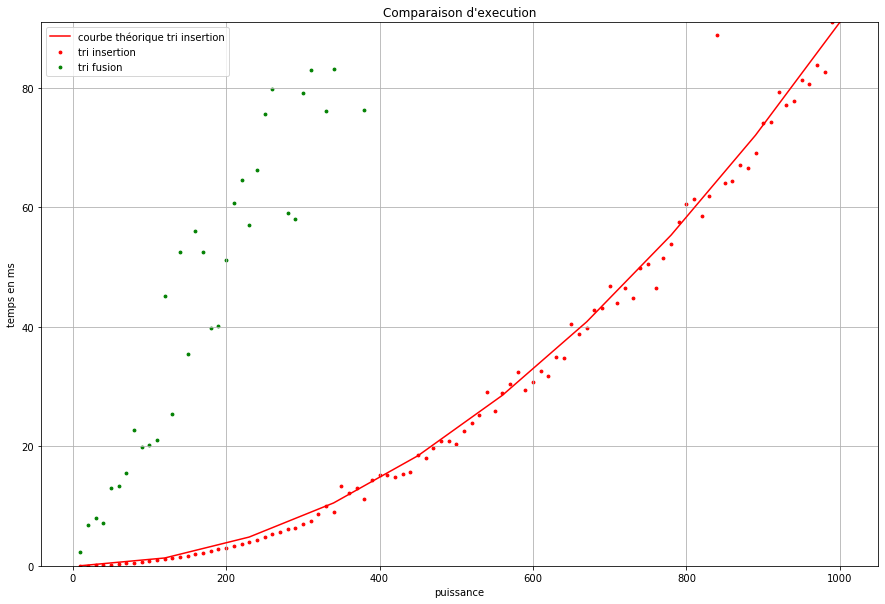

In [6]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

# faisons une liste des puissance et du pas

listes=[]
mini = 10
maxi = 1000
for n in range(mini, maxi, 10):
    listes.append([j for j in range(n,0,-1) ])
resultsA=[]
resultsB=[]
# On teste sur ce nombre
number=60
for l in listes:
    # Cas de la puissance recursive basique
    starttime = timeit.default_timer()
    tri_insertion(l)
    diffA=timeit.default_timer() - starttime
    resultsA.append(diffA)
    # Cas de la puissance recursive diviser pour régner
    starttime = timeit.default_timer()
    tri_fusion(l)
    diffB=timeit.default_timer() - starttime
    resultsB.append(diffB)

# création du graphique de points
x2 = [len(l) for l in listes]
yA = [r*1000 for r in resultsA]
yB = [r*1000 for r in resultsB]

x = np.linspace(mini, maxi,10)
y2A = max(yA)*x**2/maxi**2

plt.figure(figsize=(15,10))
plt.ylim(top=1000*max(resultsA))
plt.scatter(x2,yA, c='red', s=8, label="tri insertion")
plt.scatter(x2,yB, c='green', s=8, label="tri fusion")
plt.plot(x, y2A, '-r', label='courbe théorique tri insertion')
plt.grid(which='both')
plt.title("Comparaison d'execution")
plt.xlabel('puissance')
plt.ylabel('temps en ms')
plt.legend(loc='upper left')
plt.show()